In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from geopy.geocoders import Nominatim
import folium

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df.head(5)

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [4]:
df.shape

(7094, 37)

In [5]:
df.info

<bound method DataFrame.info of         ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8_1  Q8_2  ...  Q17  Q18  Q19  \
0     5086  98   2   3   1   1   2   2     0     0  ...   -1    4    4   
1     1258  40   1   1   3   5   1   1     1     0  ...    4    1    4   
2      331  18   2   4   6   3   2   1     0     0  ...   -1    1    1   
3     6729  50   1   1   3   1   1   1     0     0  ...   -1    1    4   
4     8671  34   1   1   1   1   2   1     0     1  ...   -1    1    4   
...    ...  ..  ..  ..  ..  ..  ..  ..   ...   ...  ...  ...  ...  ...   
7089  8378  57   2   3   3   1   2   2     0     1  ...   -1    1    4   
7090   881  32   1   1   6   3   1   1     0     1  ...   -1    1    1   
7091  6672  22   2   3   3   3   2   2     0     1  ...   -1    4    4   
7092  5416  28   2   1   3   1   2   2     0     1  ...   -1    1    4   
7093  3946  78   1   3   1   1   2   2     0     0  ...   -1    4    4   

      Latitude  Longitude  mobile_money  savings  borrowing  insurance  \
0    

In [6]:
df.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.rename(columns={'Q1':'Age','Q2':'gender','Q3':'Marital_status','Q4':'HL_edu','Q5':'Q5','Q6':'own_land','Q7':'own_mobile_phone','Q8_1':'Salaries/wages','Q8_2':'Trading/selling ','Q8_3':'Provides_service','Q8_4':'Piece_work','Q8_5':'Rental_income','Q8_6':'Savings','Q8_7':'Pension','Q8_8':'Grant_money','Q8_9':'Send_me_money','Q8_10':'No_Money','Q8_11':'Other','Q10':'Main_Sell','Q11':'Main_service_provide','Q18':'Kiswhahili','Q19':'English'}, inplace=True)

In [8]:
df.columns

Index(['ID', 'Age', 'gender', 'Marital_status', 'HL_edu', 'Q5', 'own_land',
       'own_mobile_phone', 'Salaries/wages', 'Trading/selling ',
       'Provides_service', 'Piece_work', 'Rental_income', 'Savings', 'Pension',
       'Grant_money', 'Send_me_money', 'No_Money', 'Other', 'Q9', 'Main_Sell',
       'Main_service_provide', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Kiswhahili', 'English', 'Latitude', 'Longitude', 'mobile_money',
       'savings', 'borrowing', 'insurance', 'mobile_money_classification'],
      dtype='object')

In [9]:
male = df[df.gender == 1]
female = df[df.gender == 2]

In [10]:
male

,ID,Age,gender,Marital_status,HL_edu,Q5,own_land,own_mobile_phone,Salaries/wages,Trading/selling,...,Q17,Kiswhahili,English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3
5,5462,35,1,1,3,3,2,1,0,1,...,-1,1,1,-6.362331,37.137741,0,0,1,0,1
12,8863,28,1,1,3,3,2,2,0,1,...,-1,1,4,-10.743503,34.733084,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7086,24,24,1,1,3,4,2,1,0,1,...,-1,1,1,-6.616820,39.096398,1,1,0,0,3
7087,5546,25,1,1,4,1,2,1,0,1,...,-1,1,1,-1.329040,31.808420,1,1,1,0,3
7088,8738,65,1,1,3,3,1,1,0,1,...,-1,1,4,-3.031777,33.263513,0,1,0,0,1
7090,881,32,1,1,6,3,1,1,0,1,...,-1,1,1,-2.635156,32.945423,1,1,0,0,3


In [11]:
print(len(male))

3122


In [12]:
print(len(female))

3972


In [13]:
print(len(male + female))

7094


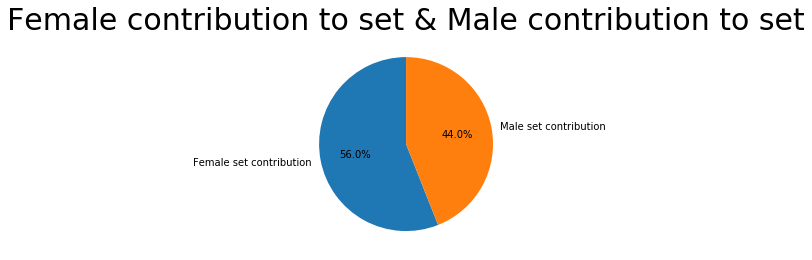

<Figure size 432x288 with 0 Axes>

In [14]:
ratios = [.56,.44,]
labels=['Female set contribution','Male set contribution']
plt.pie(ratios,explode=None, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90,)

plt.title('Female contribution to set & Male contribution to set', fontsize=30)
plt.show()
plt.savefig('Female set contribution VS Male set contribution')

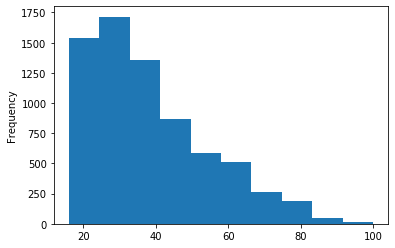

In [15]:
df['Age'].plot.hist()

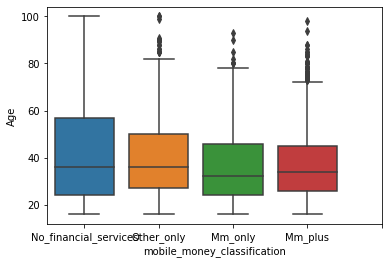

In [16]:
sns.boxplot(x='mobile_money_classification', y='Age', data=df)
ax =plt.xticks(np.arange(5), ('No_financial_services', 'Other_only', 'Mm_only', 'Mm_plus'))

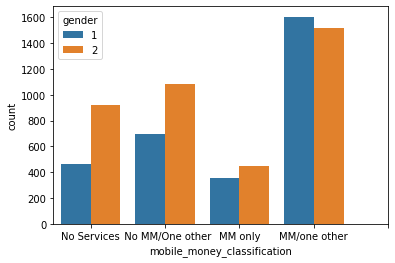

In [17]:
#gender with & without mobile money
sns.countplot(data=df,x = 'mobile_money_classification',hue = 'gender')
ax =plt.xticks(np.arange(5), ('No Services', '  No MM/One other', 'MM only', 'MM/one other'))

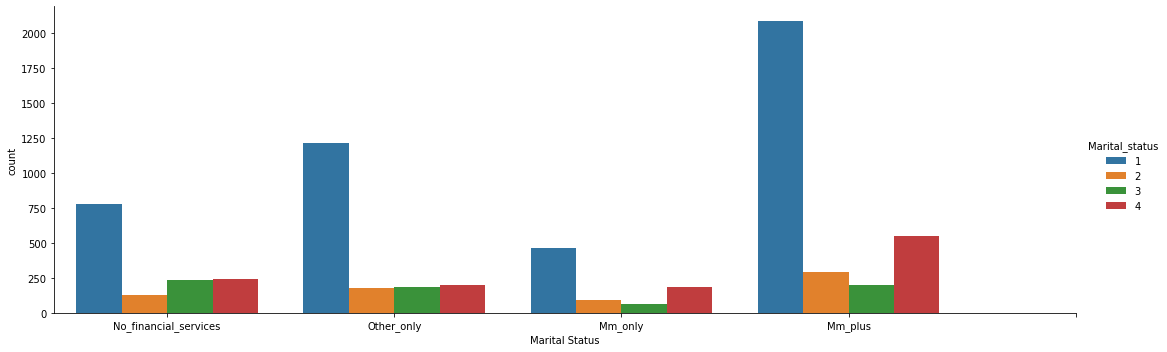

In [18]:
# Marital Status
sns.catplot(x='mobile_money_classification',kind='count', hue='Marital_status', aspect=3,data=df).set(xlabel='Marital Status')
ax =plt.xticks(np.arange(5), ('No_financial_services', 'Other_only', 'Mm_only', 'Mm_plus'))#No_financial_services, Other_only, Mm_only, Mm_plus

Alot of mobile money users are Married, leading to the assumption that because of family/spousal financial responsiblities, health etc led to them needing a the service and there might be a an opportunity here to offer a more tailor specific service 

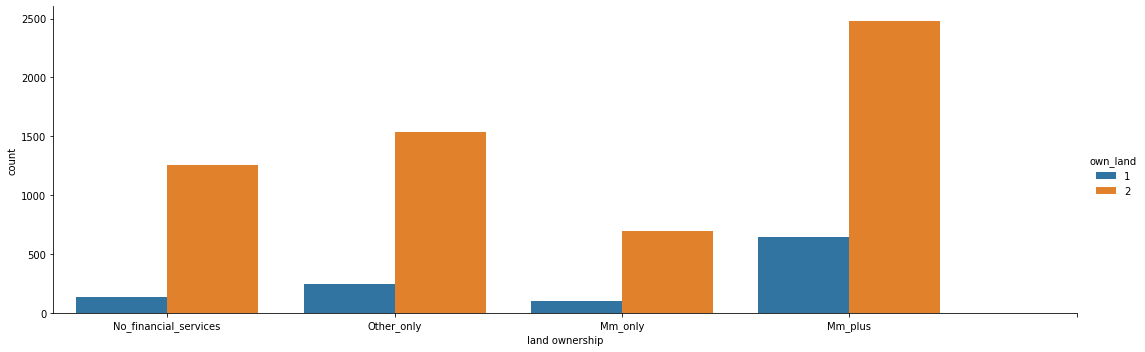

In [19]:
#land ownership
sns.catplot(x='mobile_money_classification',kind='count', hue='own_land', aspect=3, data=df).set(xlabel='land ownership')
ax =plt.xticks(np.arange(5), ('No_financial_services', 'Other_only', 'Mm_only', 'Mm_plus'))

a service here can be offered to males with land/farm

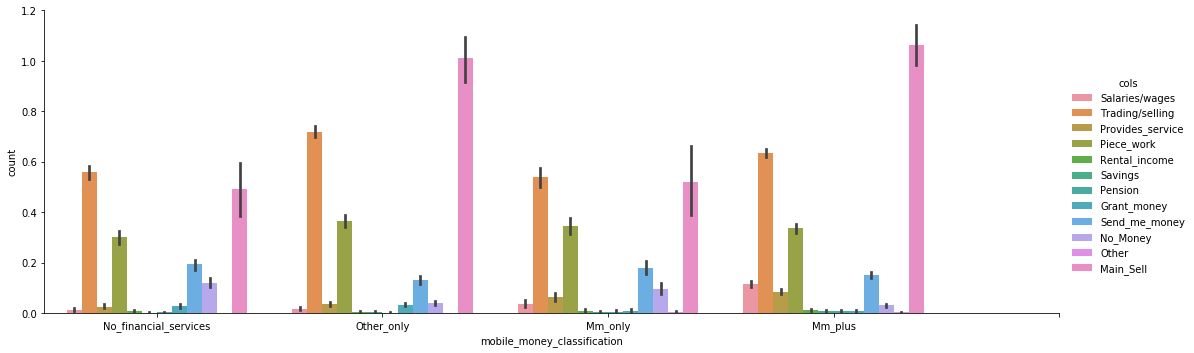

In [20]:
### Type of income
income = df[['Salaries/wages', 'Trading/selling ',
       'Provides_service', 'Piece_work', 'Rental_income', 'Savings',
       'Pension', 'Grant_money', 'Send_me_money', 'No_Money', 'Other',
       'Main_Sell', 'mobile_money_classification']]
income = income.melt('mobile_money_classification', var_name='cols', value_name='count')
sns.catplot(x='mobile_money_classification', y='count', hue='cols', aspect=3, kind='bar', data=income)
ax =plt.xticks(np.arange(5), ('No_financial_services', 'Other_only', 'Mm_only', 'Mm_plus'))

In [21]:
lat = -6.3728253 ; lon = 34.8924826
Country_map = folium.Map(location=[lat, lon], zoom_start=6)

for lat, long, label in zip(df['Latitude'],df['Longitude'],'Salaries/wages'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'black',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(df['Latitude'],df['Longitude'],'Trading/selling '):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'green',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(df['Latitude'],df['Longitude'],'Provides_service'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'red',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(df['Latitude'],df['Longitude'],'Piece_work'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'blue',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(df['Latitude'],df['Longitude'],'Rental_income'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'grey',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(df['Latitude'],df['Longitude'],'Savings'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'black',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map



for lat, long, label in zip(df['Latitude'],df['Longitude'],'Pension'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'red',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(df['Latitude'],df['Longitude'],'Grant_money'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'green',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(df['Latitude'],df['Longitude'],'Send_me_money'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'green',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map

for lat, long, label in zip(df['Latitude'],df['Longitude'],'No_Money'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'grey',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(df['Latitude'],df['Longitude'],'Other'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'green',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map